# Feature Engineering for Heart Disease Diagnostic Dataset

### Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Importing dataset

In [2]:
df = pd.read_csv("heart_disease_dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [5]:
len(df.columns)

14

### Detail information if all the features

**There are Fourteen features in Dataset**
```pyton
 age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: Heart disease (0 = no, 1 = yes)
```

### Checking Missing Values

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**Their is no null values in our dataset**

### Percentage of people having Heart Disease

In [7]:
num = df.groupby('num').size()
num

num
0    164
1    139
dtype: int64

```python
Out of 303 peoples 139 having 'heart Disease' & 164 not having hear desease.
```

### Converting Numerical Data into Categorical Data

In [8]:
def Heart_Disease(row):
    if row == 0:
        return 'Absence'
    else:
        return 'Presence'

### Applying converted data into our dataset with new column - Heart_Disease

In [9]:
df['Heart_Disease'] = df['num'].apply(Heart_Disease)

In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Presence
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Presence
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Presence
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Presence


In [11]:
num = df.groupby('Heart_Disease')['num'].count()
num

Heart_Disease
Absence     164
Presence    139
Name: num, dtype: int64

### Pie Chart Creation of Heart Disease Population % using MatplotLib

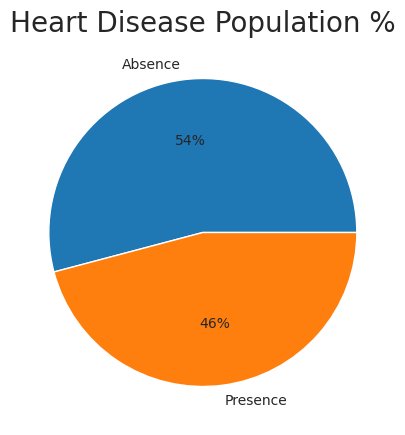

In [12]:
plt.figure(figsize= (6,5))
plt.pie(num,labels=['Absence','Presence'],autopct= '%0.0f%%')
plt.title('Heart Disease Population %',fontsize = 20)
plt.show()

```python
In Overall population 46% People having Heart Disease.
& 54% people not having Heart Disease.
```

### Countplot Creation of Population Age

Text(0, 0.5, 'Count')

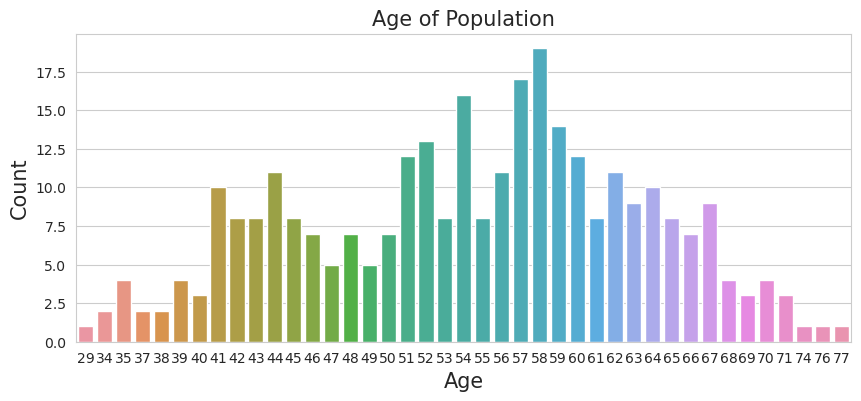

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(x = 'age',data=df)
plt.title('Age of Population',fontsize = 15)
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Count',fontsize = 15)

```python
From the above Analysis, We conclude that we need divide the age population into the group of :- 
Young
Middle
Elder
```

In [14]:
Minimum_Age  = df['age'].min()
Maximum_Age  = df['age'].max()
Mean_Age  = df['age'].mean()
print("Minimum Age in Population:- ",Minimum_Age)
print("Maximum Age in Population:- ",Maximum_Age)
print("Mean Age of Population:- ",Mean_Age)

Minimum Age in Population:-  29
Maximum Age in Population:-  77
Mean Age of Population:-  54.43894389438944


In [15]:
Young_Ages = df[(df['age']>Minimum_Age) & (df['age']<40)]
Middel_Ages = df[(df['age']>40) & (df['age']<55)]
Elder_Ages =  df[(df['age']>55)]
print("Young Ages:- ",len(Young_Ages))
print("Middle Ages:- ",len(Middel_Ages))
print("Elder Ages:- ",len(Elder_Ages))

Young Ages:-  14
Middle Ages:-  125
Elder Ages:-  152


### Bar Plot Creation of Age Category 

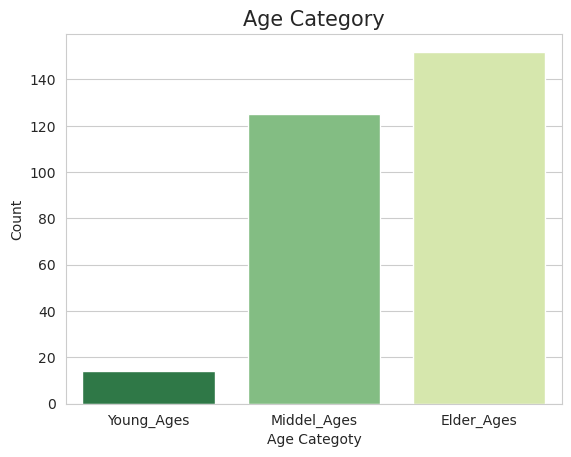

In [16]:
sns.barplot(x= ['Young_Ages','Middel_Ages','Elder_Ages'],y = [len(Young_Ages),len(Middel_Ages),len(Elder_Ages)],palette='YlGn_r')
plt.title('Age Category',fontsize = '15')
plt.xlabel('Age Categoty',fontsize = '10')
plt.ylabel('Count',fontsize = 10)
plt.show()

### Converting Sex column from Numerical Data to Categorical Data

In [17]:
def Gender(row):
    if row == 1:
        return 'Male'
    elif row == 0 :
        return 'Female'
    

### Applying converted data into our dataset with new column - sex1

In [18]:
df['sex1'] = df['sex'].apply(Gender)

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female


### Converting age Numerical Data into Categorical Data

In [20]:
def Age(row):
    if (row >=29 and row < 40):
        return 'Young Age'
    elif (row >=40 and row < 55):
        return 'Middle Age'
    elif (row >= 55):
        return 'Elder Age'

### Applying converted data into our dataset with new column - Age_Range

In [21]:
df['Age_Range'] = df['age'].apply(Age)

In [22]:
df['Age_Range'].value_counts()

Elder Age     160
Middle Age    128
Young Age      15
Name: Age_Range, dtype: int64

### Swarm Plot Creation of Gender Based Age Category

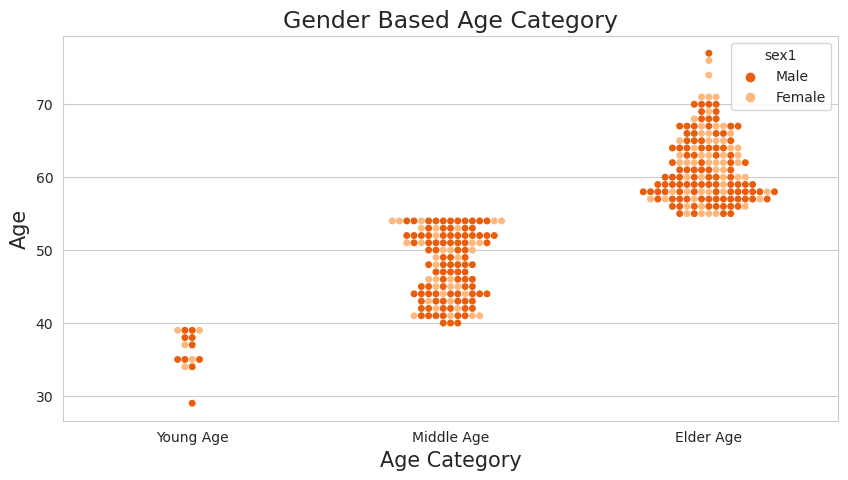

In [23]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=df, order=['Young Age', 'Middle Age', 'Elder Age'], palette='Oranges_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()


```python
In Our Population Number Of Males are more in Middle Age Category and Females are more in Elder Age Category
```

### Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

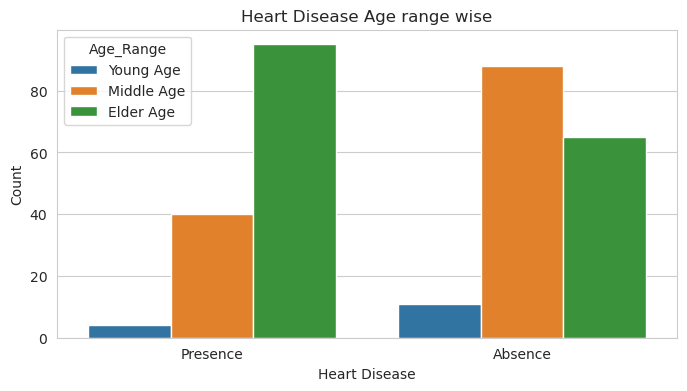

In [24]:
plt.figure(figsize = (8,4))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x ='Heart_Disease',hue ='Age_Range',data = df,order = ['Presence','Absence'],hue_order=hue_order)
plt.title('Heart Disease Age range wise')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

```python
'Elder Age' People are most affected by Heart Disease AND Middle Age People are mo`mstly FREE from any kind of Heart Disease
```

### Count Plot Creation of Heart Disease Based on Gender

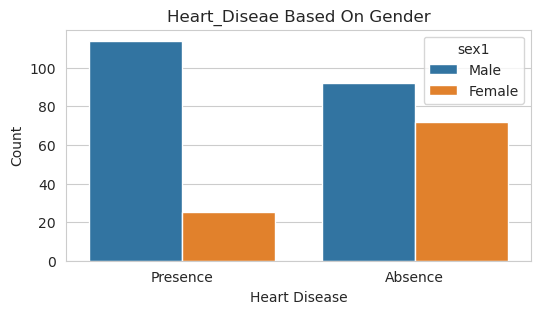

In [25]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'Heart_Disease',hue = 'sex1',data = df,order = ['Presence','Absence'] )
plt.title('Heart_Diseae Based On Gender')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

```python
We can see that Males are more prone to Heart Disease
```

### Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

### Count Plot Creation of Chest Pain Experienced

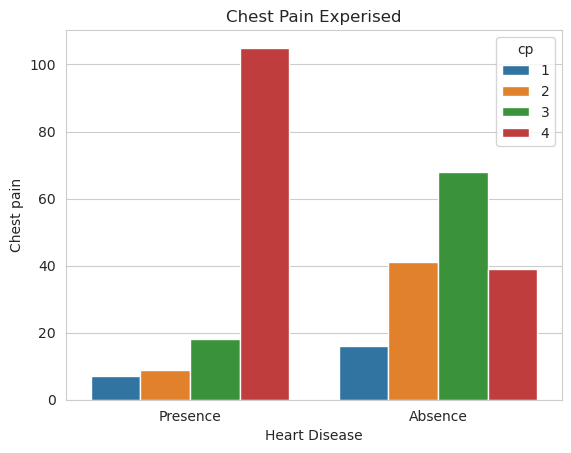

In [30]:
sns.countplot(x = 'Heart_Disease',hue = 'cp',data = df, order = ['Presence','Absence'])
plt.title("Chest Pain Experised")
plt.xlabel('Heart Disease')
plt.ylabel('Chest pain')
plt.show()

```python
It seems people having asymptomatic chest pain have a 'higher chance of heart disease'
Asymptomatic Chest pain means neither causing nor exhibiting symptoms of Heart disease.
```

### Count Plot Creation of Chest Pain Based On Gender

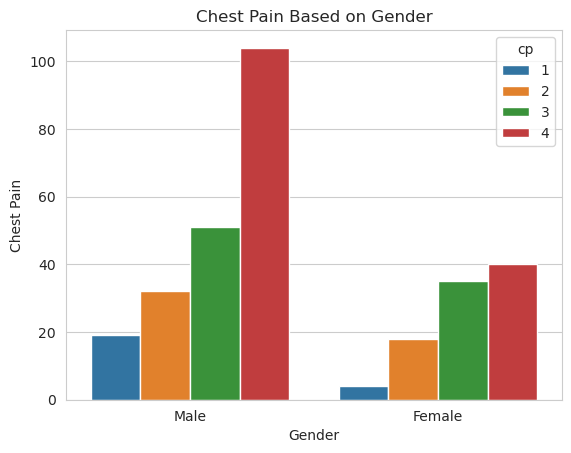

In [32]:
sns.countplot(x= 'sex1',hue = 'cp',data = df, order = ['Male','Female'])
plt.title('Chest Pain Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Chest Pain')
plt.show()

```python
We can see that a 'higher number of men' are suffering from Asymptomatic type of 'Chest Pain'
```

### Count Plot Creation of Chest Pain Based On Age Category

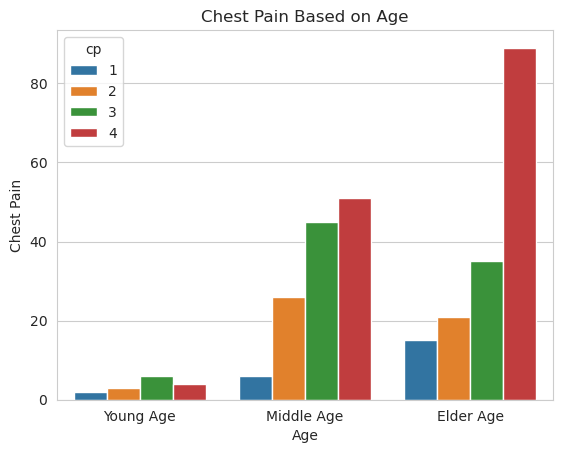

In [37]:
sns.countplot(x='Age_Range',hue = 'cp', data = df, order = ['Young Age','Middle Age','Elder Age'] )
plt.title("Chest Pain Based on Age")
plt.xlabel('Age')
plt.ylabel('Chest Pain')
plt.show()

```python
There is very high number of Asymptomatic Pain in Elderly age Category
```

### Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) 

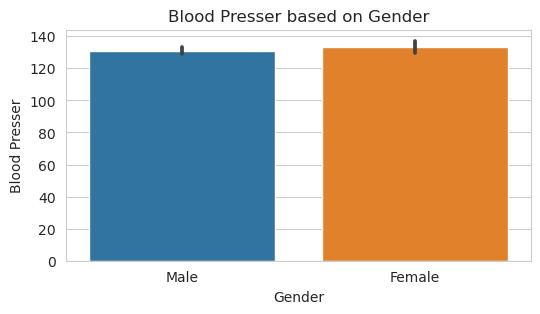

In [68]:
plt.figure(figsize = (6,3))
sns.barplot(x ='sex1',y='trestbps',data = df)
plt.title("Blood Presser based on Gender")
plt.xlabel('Gender')
plt.ylabel('Blood Presser')
plt.show()

```python
Blood Pressure Rate is almost equal in Males and Females
```

### Bar Plot Creation of Cholestrol Level Based On Gender

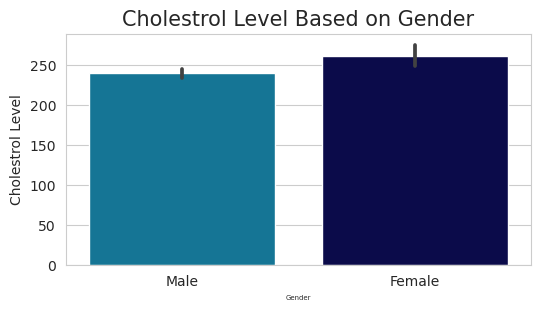

In [67]:
plt.figure(figsize = (6,3))
sns.barplot(x = 'sex1',y = 'chol', data = df,palette='ocean_r')
plt.title('Cholestrol Level Based on Gender',fontsize = 15)
plt.xlabel('Gender',fontsize = 5)
plt.ylabel('Cholestrol Level',fontsize = 10)
plt.show()

```python
Higher Blood Pressure Level results Chances Of Heart Disease
```

#### Line Plot Creation of Blood Pressure VS Age

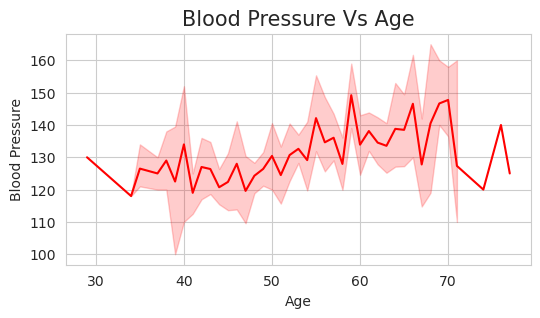

In [66]:
plt.figure(figsize = (6,3))
sns.lineplot(x = 'age',y = 'trestbps',data = df,color = 'r')
plt.title("Blood Pressure Vs Age",fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

```python
Here we can observe that Blood Pressure increases between age of 50 to 60 and somehow continue the pattern till 70.
```

### Line Plot Creation of Cholestrol VS Age

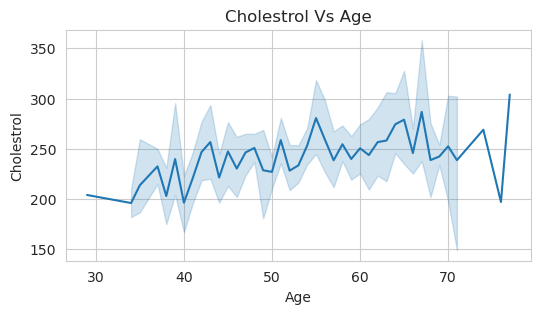

In [75]:
plt.figure(figsize=(6,3))
sns.lineplot(x = 'age',y= 'chol', data = df)
plt.title('Cholestrol Vs Age')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.show()

```python
Similarly Cholestrol Increasing in the age group of 50-60
```

### Line Plot Creation of ST Depression VS Age

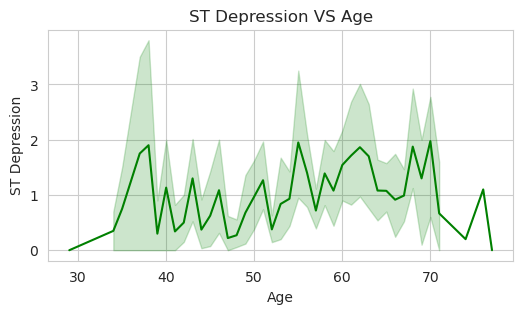

In [79]:
plt.figure(figsize = (6,3))
sns.lineplot(x= 'age',y = 'oldpeak',data = df,color = 'g')
plt.title("ST Depression VS Age")
plt.xlabel('Age')
plt.ylabel('ST Depression')
plt.show()

```python
we can observe from here that ST depression mostly increases bw the age group of 30-40
ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.
```

### Bar Plot Creation of ST depression VS Gender

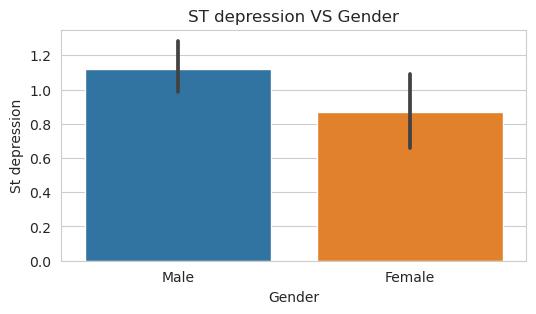

In [84]:
plt.figure(figsize=(6,3))
sns.barplot(x= 'sex1',y = 'oldpeak',data = df)
plt.title('ST depression VS Gender')
plt.xlabel('Gender')
plt.ylabel('St depression')
plt.show()

```python
More Males are prone to ST depression as compare to females
```

### Bar Plot Creation of Exercise With Angina VS Heart Disease

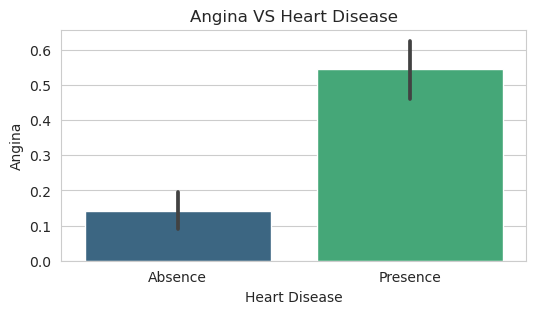

In [88]:
plt.figure(figsize=(6,3))
sns.barplot(x='Heart_Disease', y='exang', data=df, palette='viridis')
plt.title('Angina VS Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Angina')
plt.show()

```python
If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.
```

### Bar Plot Creation of Exercise With Angina VS Gender

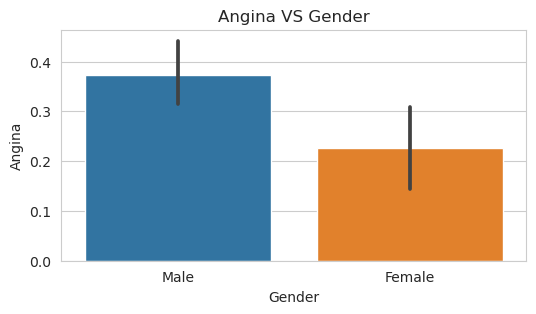

In [93]:
plt.figure(figsize=(6,3))
sns.barplot(x='sex1', y='exang', data=df)
plt.title("Angina VS Gender")
plt.xlabel("Gender")
plt.ylabel("Angina")
plt.show()

```python
Males have have high Exercise Angina
A type of chest pain caused by reduced blood flow to the heart.
```

### Bar Plot Creation of Fasting Blood Sugar VS Gender

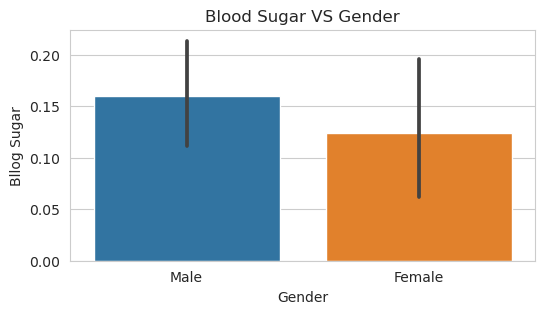

In [96]:
plt.figure(figsize=(6,3))
sns.barplot(x = 'sex1',y='fbs',data = df)
plt.title('Blood Sugar VS Gender')
plt.xlabel('Gender')
plt.ylabel('Bllog Sugar')
plt.show()

```python
Males have high no of Fasting Blood Sugar over 120
```

### Heatmap Creation using Seaborn

/tmp/ipykernel_111/1254785442.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidth=3)


<AxesSubplot: >

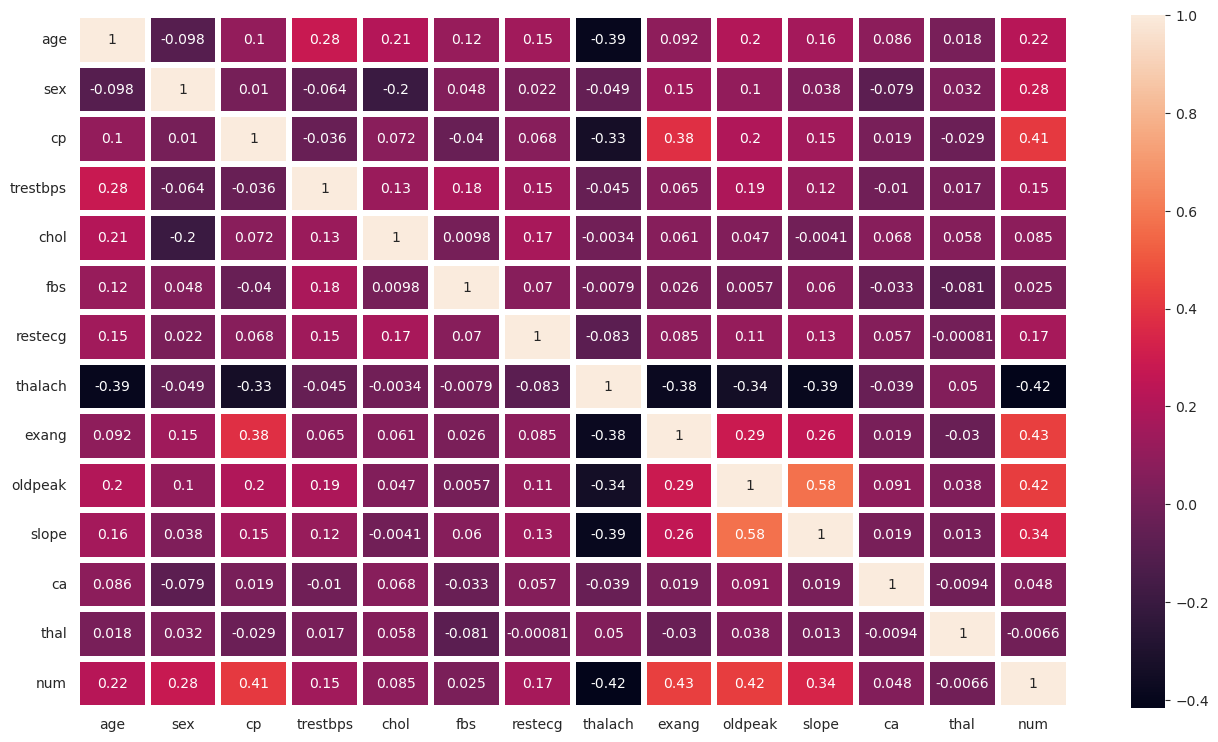

In [98]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True, linewidth=3)